# Star-formation; the Initial Mass Function

## Authors
B.W. Holwerda

## Learning Goals
* The concept of the Initial Mass Function
* The mass to luminosity relation
* The Mass-maximum age relation
* Integrating the IMF
* Evolution of single stellar populations (SSP)
  
## Keywords


## Companion Content

Chapter 17 in Ryden \& Peterson

Chapters 12 and 26 of Carroll & Ostlie

## Summary

In this exercise, we will examine the Initial Mass Function and its effects on the luminosity of a single stellar population. We will evolve such a population and see how bright it remains. 

<hr>



## Student Name and ID:



## Date:

<hr>

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15

# The Initial Mass Function

When gas clouds collapse into proto-stars, the cloud fragments. As a result, there are fewer massive stars than there are lower mass ones. The freqency of stars as afunction of mass is called the *initial mass function*, the mass distribution of newly formed stars.

The IMF is often modeled as a power-law:

$$ {dN \over dM} = C m^{-(1+x)} $$

The original expression for the IMF comes from Salpeter (1955) with a simple single exponent (x). Later other forms were a piecewise series of power-law segments (e.g., Kroupa, 2001) or a log-normal at low masses with a power-law tail at high masses (e.g., Chabrier, 2003a).

We now typically use a shorthand (Salpeter, Kroupa, or Chabrier) for the shape of the IMF we are assuming when talking about stellar populations. And it is an assumption! 

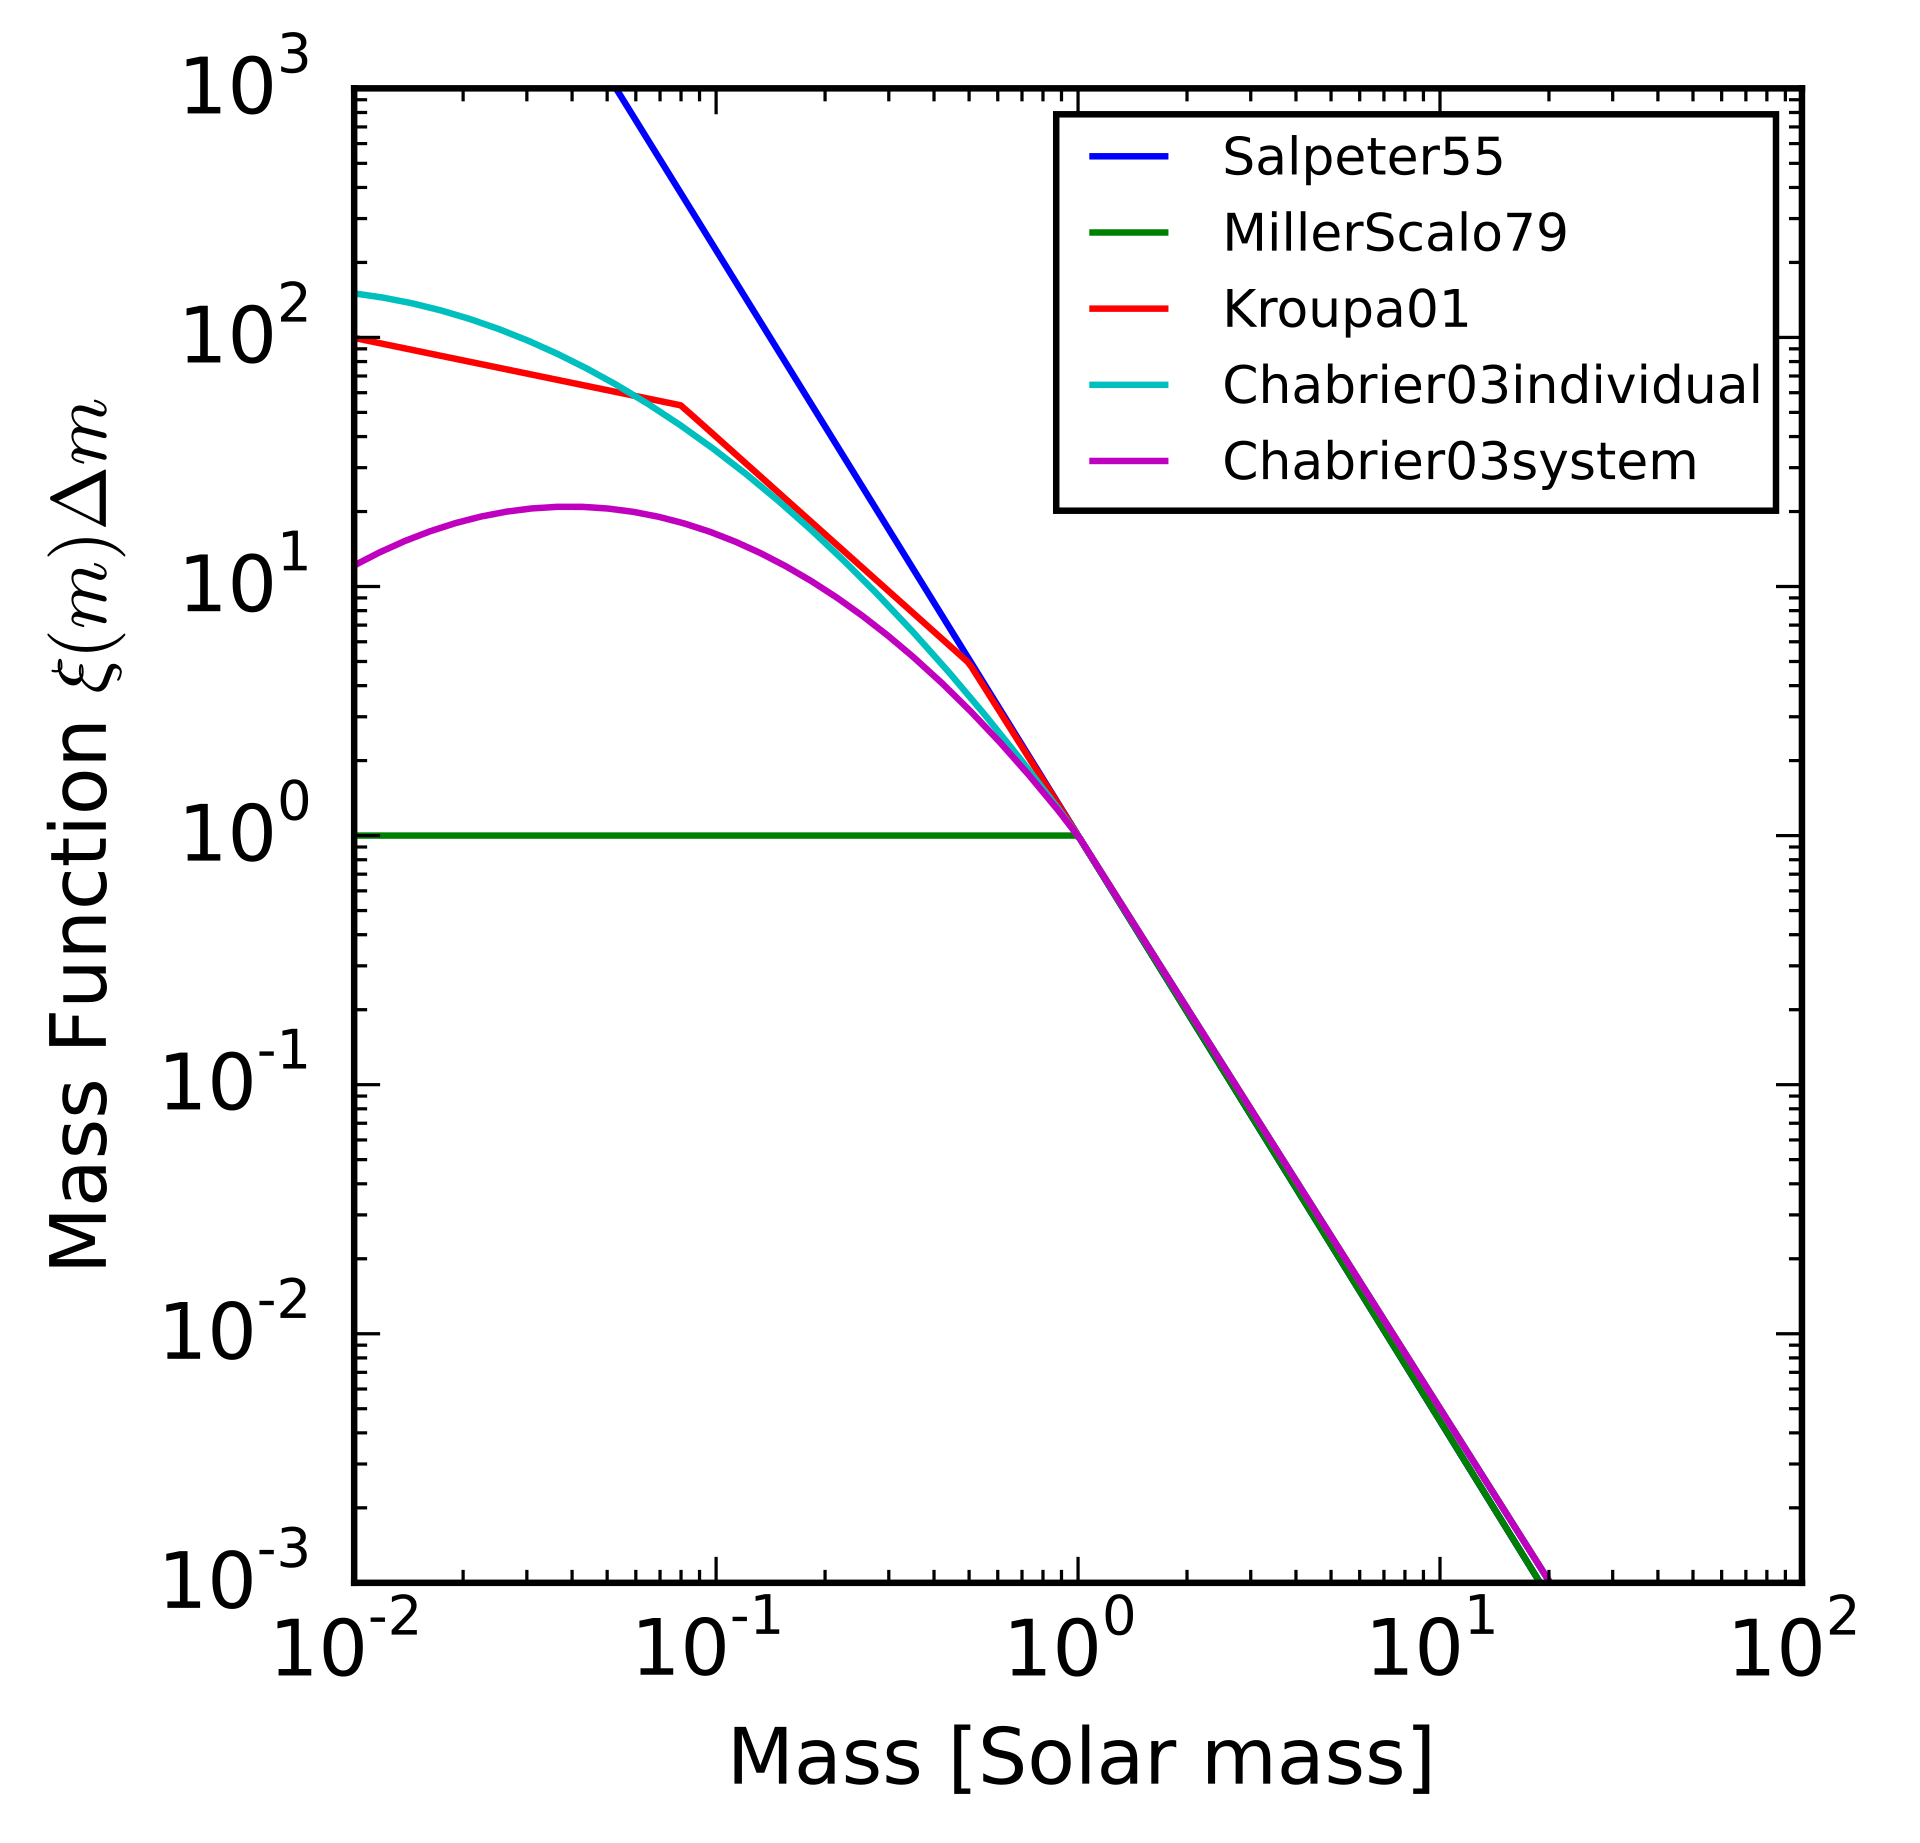
from the wikipedia entry for IMF: https://en.wikipedia.org/wiki/Initial_mass_function Illustration by Johannes Buchner - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=44779435

Note that the IMF is normalized with respect to the Solar Mass: there is one Sol for one solar mass. 

You can check out the Figure here from https://www.astro.ljmu.ac.uk/~ikb/research/imf-use-in-cosmology.html to illustrate the different shapes of the IMF in use for various stellar population models.



In [403]:

def Salpeter(M, C=1.):
    N = C*M**(-2.35)
    return N

def Kroupa(M, C=1):

    N = C*M**(-2.3)

    C1 = C*(0.5)**(-2.3)/(0.5)**(-1.3) # renormalizing
    
    N[np.where(M<0.5)] = C1*M[np.where(M<0.5)]**(-1.3)

    C2 = C1*(0.08)**(-1.3)/(0.08)**(0.3) # renormalizing

    N[np.where(M<0.08)] = C2*M[np.where(M<0.08)]**(0.3)

    return N

def Chabrier(M,C=1):
    N = C*M**(-2.35)

    C1 = 1./ ( (0.158/(np.log(10)) )*np.exp( -( (np.log10(1.) - np.log10(0.08))**2 )/( 2*0.69**2) ) )# renormalizing
    
    N[np.where(M<1.)] = C1*(0.158/(M[np.where(M<1.)]*np.log(10)) )*np.exp( -( (np.log10(M[np.where(M<1.)]) - np.log10(0.08))**2 )/( 2*0.69**2) ) 
    
    return N




### Assignment 1 -- Plot the IMF 

Plot the three functions of the IMF for a range of 0.01 to 100 solar mass stars. Make sure axes and the three curves are labeled!

In [1]:
# student work here


# Mass-Luminosity Relation

The relationship between mass and luminosity is also a power law:

$$ {L \over L_\odot}  = \left({ M \over M_\odot}\right)^\alpha $$

where $\alpha=3.5$. But this is a relation that works on the main sequence of stars on color-magnitude diagram.


In [409]:
def M2L(M):
    L = M**3.5
    return L

### Assigment 2 -- Integrating the IMF Luminosity

We can now integrate the IMF numerically to get the total luminosity of a freshly formed new population of stars.
Let's do so for all three IMF functions. Sum the product of the number of stars and their luminosities on the Main Sequence. 

In [3]:
# student work here


### Assigment 3 -- Total luminosity per IMF shape

What do you notice about the difference in luminosity right at the point of formation for a stellar population described by the three IMF shapes?

*student written answer here*

### Ageing the IMF

This is the total luminosity of our initial mass function when they are all on the Main Sequence. But the more massive stars will die out first. Age 

$$ t = \left({M \over M_\odot}\right)^{-3} \times 10 \ Gyr $$

which means at a particular point in time (say 0.5 Gyr or 5Gyr) there is an upper limit to the mass of stars that are still present.
We will define two convenience functions, one which returns the masses still present at a given time (tlim) and one which calculates the maximum mass for a mass range given a time series, returning a maximum mass at each time in the time series. 

In [417]:
def Age(M,tlim):
    t_ages = (M**(-3))*10.
    return M[np.where(t_ages > tlim)]

def MaxMass(M,t):
    Mmax = []
    for tt in t:
        Mmax.append(np.max(Age(M,tt)))
    return Mmax


### Assignment 4 -- Maximum mass 

Using the above convenience function, plot the maximum mass present on the Main Sequence as a function of time.
Our timeline starts at 100 Myr and ends at 13 Gyr (roughly for how long stars have been around. 

In [6]:
t = np.arange(0.1,13,0.1)

# student work here


NameError: name 'np' is not defined

### Assignment 5 -- Start at a younger age 

Redo the above plot, but start the population starts (let's say 1 Myr). What do you notice?

In [8]:
#student work here


### Assignment 6 -- Starting at a younger age 

from assignments 4 and 5, what do you notice about the maximum mass of a population as a function of age?

*student answer here*

### Assignment 7 -- Ageing the different IMFs

Starting from 1 Myr, increasing in steps of 1 Myr and ending at 13 Gyr, age the total luminosity of a population of stars for all three most commonly used IMFs:

* define a time range
* define three empty lists for each IMF type
* step through the time range
* calculate the maximum in the mass range for that time step
* define a mass range allowed at that time.
* use the total luminosity calculation from above to calculate the luminosity for stars in the allowed mass range for the age
* plot total luminosit for each IMF as a function of time.
* Instead of plot, consider using semilogy to show a logarithmic y-axis
* label the axes and the three IMF's

In [10]:
# student work here


### Assignment 8 -- Very Early Evolution

Instead of focusing on the full range of ages. Focus on the first 10 Myr in steps of 1 Myr (remember that all the functions above use Gyr for time input). You may want to change the transparency and line style for each plot.

In [12]:
# student work here


### Assignment 9 -- Conclusions

If you examine the evolution of the total luminosity of a single stellar population, where do we see noticeable differences in the total luminosities? How does this affect our ability to distinguish between the different IMF shapes?

*student written answer here*

### Assignment 10 -- Interpretation

For a very long time, most astronomers modeling galaxies (many different generations of stars overlapping), did not bother changing the IMF they chose. They posited a particular shape for the IMF, often one f the three above, and kept it constant. Only more recently has the IMF been allowed to change over time (e.g. "bottom-heave" or "top-heavy" to explain the observed light from galaxies in the distant Universe. Why do you think changing the IMF was considered "the last refuge of a scoundrel"? 

*student written answer here*

<hr>